# Data Preparation

### Loading Data

In [101]:
### Data Analisy Libraries ###
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from datetime import datetime, time, date as dt
import json

In [102]:
#pd.options.display.float_format = '{:.2f}'.format
pd.set_option("display.max_columns", 35)
data_raw =  pd.read_csv('../data/kc_house_data.csv', low_memory=False)

In [103]:
data_raw.shape

(21613, 21)

### Dealing with missing values

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int32         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int8          
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int32         
 6   sqft_lot       21613 non-null  int32         
 7   floors         21613 non-null  category      
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int8          
 10  condition      21613 non-null  int8          
 11  grade          21613 non-null  int8          
 12  sqft_above     21613 non-null  int32         
 13  sqft_basement  21613 non-null  int32         
 14  yr_built       21613 non-null  int16         
 15  yr_renovated   2161

In [105]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price_m2         0
year             0
month            0
week_of_year     0
day              0
season           0
dtype: int64

## Feature Engineering

In [106]:
data['price_m2'] = round(data['price'] / data['sqft_living'],2)
data['price'] = round(data['price'],2)

In [107]:
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d")
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data['week_of_year'] = data['date'].dt.isocalendar().week
data['day'] = pd.DatetimeIndex(data['date']).day

In [108]:
data['season'] = data['week_of_year'].apply(lambda x: 'Summer' if (x >= 25) & (x <= 38) 
                                            else 'Fall' if (x >= 39) & (x <= 50) 
                                            else 'Spring' if (x > 11) & (x<= 24) 
                                            else 'Winter')

### Fixing Data Types

In [109]:
data = data.astype({"id": 'int32', 
                    # date
                    #"price": 'int64',
                    "bedrooms": 'int8',
                    #"bathrooms": 'int8',
                    "sqft_living": 'int32',
                    "sqft_lot": 'int32',
                    # floors": 'float',
                    #"waterfront     ": 'category', 
                    "view": 'int8',
                    "condition": 'int8',
                    "grade": 'int8',
                    "sqft_above": 'int32',
                    "sqft_basement": 'int32',
                    "yr_built": 'int16',
                    "yr_renovated": 'int16', 
                    "zipcode": 'int32', 
                    #"lat            ": 'int32',
                    "sqft_living15": 'int32',
                    "sqft_lot15": 'int32'
                   })


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int32         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int8          
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int32         
 6   sqft_lot       21613 non-null  int32         
 7   floors         21613 non-null  category      
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int8          
 10  condition      21613 non-null  int8          
 11  grade          21613 non-null  int8          
 12  sqft_above     21613 non-null  int32         
 13  sqft_basement  21613 non-null  int32         
 14  yr_built       21613 non-null  int16         
 15  yr_renovated   2161

In [111]:
data.describe().drop(columns=['id']).T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01
sqft_above,21613.0,1788.390691,828.090978,290.0000,1190.000,1560.0000,2210.000,9.410000e+03


# Exploratory Data Analysis


  * Qual a relação entre preço e oferta na região?
  * As condições do imovel influencião muito mais no preço do que sua arquitura
  * Os imoveis como um todo possuem aproximadamente a mesma média de preços

In [112]:
sns.set_style("whitegrid")
#plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelpad'] = 14
plt.rcParams['figure.dpi']= 60

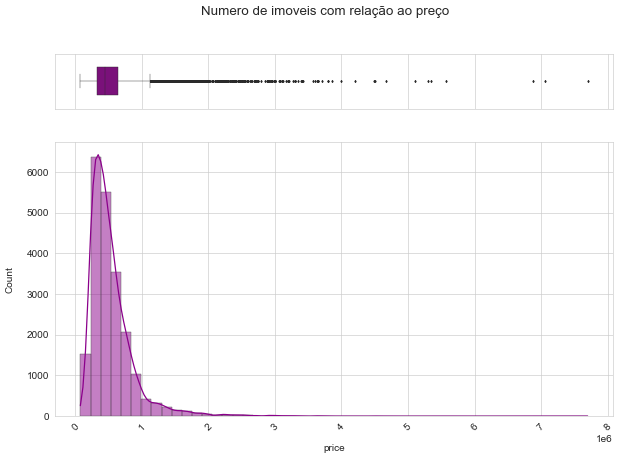

Mediana: 450000.0


In [48]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw = {"height_ratios": (0.2, 1)})
fig.suptitle('Numero de imoveis com relação ao preço')
sns.boxplot(x=data['price'], ax=ax_box, linewidth=.5, width=.5,color="DarkMagenta", fliersize=2)
ax_box.set(xlabel='')
sns.histplot(data=data['price'], ax=ax_hist, bins=50, kde=True, color="DarkMagenta", edgecolor=".3", linewidth=.5 )
plt.xticks(rotation=45)

plt.savefig("..//images//count_price.png")
plt.show()

median_p = data['price'].median()
print(f'Mediana: {median_p}')

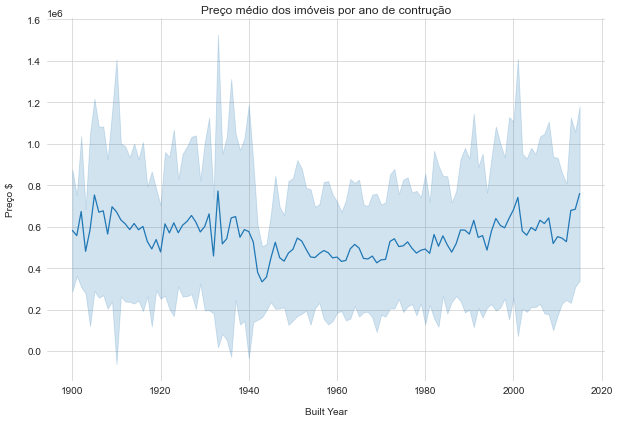

In [49]:
sns.lineplot(data=data, x="yr_built", y="price", ci="sd")
plt.title("Preço médio dos imóveis por ano de contrução")
plt.xlabel("Built Year")
plt.ylabel("Preço $")
sns.despine(left=True, bottom=True)
plt.show()

In [50]:
data['data_age'] = data['yr_built'].apply(lambda x: 'New' if x > 2000 
                                         else 'so' if x > 1960 
                                         else 'old')

age_mean_price=round(data.groupby('data_age')['price'].mean(),2)
age_sum_price=data.groupby('data_age')['price'].sum()
age_counts=round(data['data_age'].value_counts(normalize=True)*100,2)
age_counts_p=data['data_age'].value_counts()
age = pd.concat([age_mean_price, age_sum_price, age_counts, age_counts_p], axis=1)
age.columns = ['Mean Price', 'Sum Prices', 'Percentage','Count']
age



,Mean Price,Sum Prices,Percentage,Count
New,615314.92,2.794145e+09,21.01,4541
old,522488.29,3.990243e+09,35.34,7637
so,518127.91,4.888537e+09,43.65,9435


In [51]:
def dif_per(a,b):
    dp=(a-b)*100/b
    return dp

In [73]:
# separando a média entre os imóveis
before1950 = data.loc[data['yr_built'] < 1950,'price'].mean()
after1950 = data.loc[data['yr_built'] >= 1950,'price'].mean()

before2000 = data.loc[data['yr_built'] < 2000,'price'].mean()
after2000 = data.loc[data['yr_built'] >= 2000,'price'].mean()

dp=dif_per(before1950,after1950)
dp1=dif_per(after2000,before2000)



print(f'Imoveis construídos antes de 1960 são {dp :.2f}% mais baratos que a média')
print(f'Imoveis construídos depois de 2000 {dp1 :.2f}% mais caros que a média')
age_counts=round(data['data_age'].value_counts(normalize=True)*100,2)
print('Porcentagem')
#age_counts

Imoveis construídos antes de 1960 são 1.57% mais baratos que a média
Imoveis construídos depois de 2000 19.38% mais caros que a média
Porcentagem


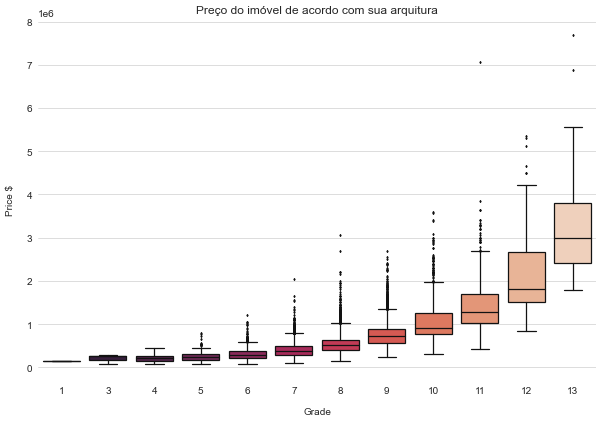

In [53]:
sns.boxplot(data=data, x="grade", y="price", palette='rocket', fliersize=2)
plt.title("Preço do imóvel de acordo com sua arquitura")
plt.xlabel("Grade")
plt.ylabel("Price $")
sns.despine(left=True, bottom=True)

#g.bar_label(i, color='white', label_type= 'center',fontsize='x-large',fmt='%.2f')
    
plt.savefig("..//images//grades.png")
plt.show()

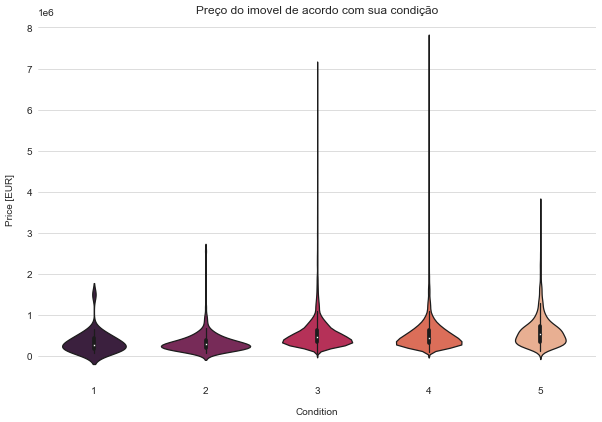

In [54]:
sns.violinplot(data=data, x="condition", y="price", palette='rocket', fliersize=2)
plt.title("Preço do imovel de acordo com sua condição")
plt.xlabel("Condition")
plt.ylabel("Price [EUR]")
sns.despine(left=True, bottom=True)
plt.savefig("..//images//condition.png")
plt.show()

In [55]:
pd.crosstab(data['condition'], data['grade'], margins=True, margins_name = 'Total')

grade,1,3,4,5,6,7,8,9,10,11,12,13,Total
condition,,,,,,,,,,,,,
1,1,0,1,9,11,6,2,0,0,0,0,0,30
2,0,1,5,15,59,75,13,2,2,0,0,0,172
3,0,1,13,100,1035,5234,4269,2041,921,332,74,11,14031
4,0,0,10,84,685,2833,1394,446,156,56,13,2,5679
5,0,1,0,34,248,833,390,126,55,11,3,0,1701
Total,1,3,29,242,2038,8981,6068,2615,1134,399,90,13,21613


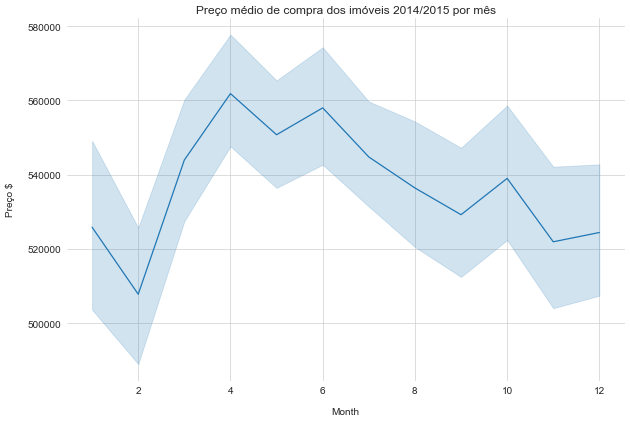

In [56]:
sns.lineplot(data=data, x="month", y="price")
plt.title("Preço médio de compra dos imóveis 2014/2015 por mês")
plt.xlabel("Month")
plt.ylabel("Preço $")
sns.despine(left=True, bottom=True)
plt.savefig("..//images//price_month.png")
plt.show()

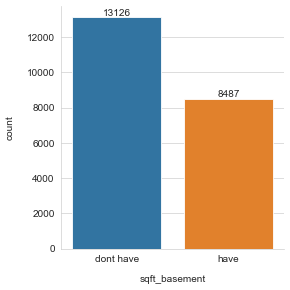

In [57]:
aux_basement = data[['sqft_basement', 'sqft_lot','price']].copy()
aux_basement['sqft_basement'] = aux_basement['sqft_basement'].apply(lambda x: 'have' if x !=0 else 'dont have')
g = sns.catplot(x='sqft_basement', kind='count', data=aux_basement)
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])
plt.savefig("..//images//basement.png")
    
#print(f'Imoveis com porão possu preço médio superior de {dp}%')

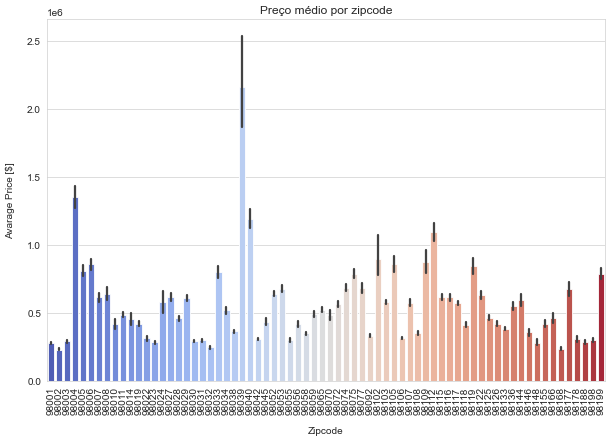

In [58]:
sns.barplot(data=data, x="zipcode", y="price", palette='coolwarm')
plt.title("Preço médio por zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Avarage Price [$]")
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Avarage Price [$]')

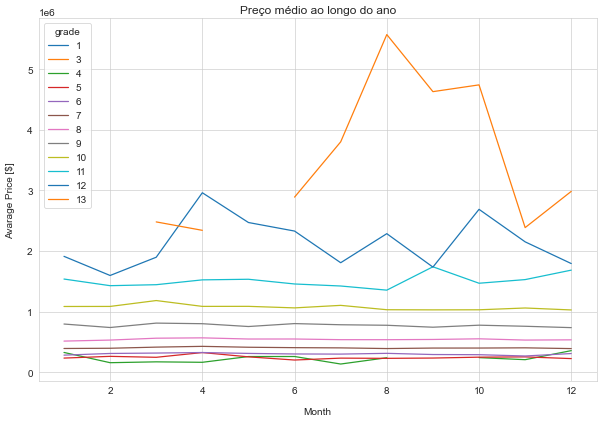

In [59]:
aux2 = data[['month', 'grade', 'price']].groupby( ['month','grade'] ).mean().reset_index()
aux2.pivot( index='month', columns='grade', values='price' ).plot()
plt.title("Preço médio ao longo do ano")
plt.xlabel("Month")
plt.ylabel("Avarage Price [$]")

<AxesSubplot:xlabel='week_of_year'>

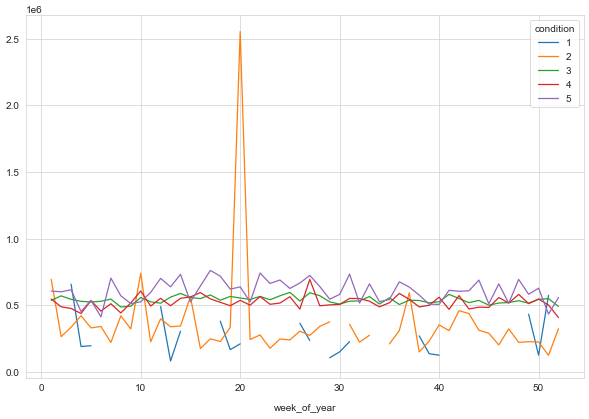

In [60]:
aux2 = data[['week_of_year', 'condition', 'price']].groupby( ['week_of_year','condition'] ).mean().reset_index()
aux2.pivot( index='week_of_year', columns='condition', values='price' ).plot()


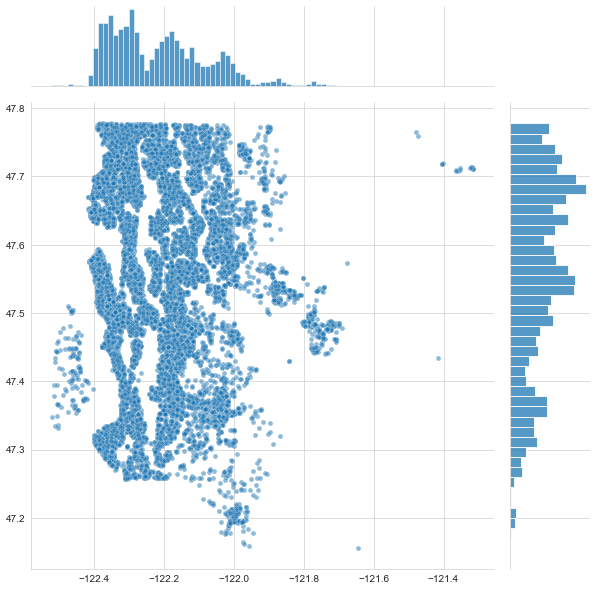

In [61]:
sns.jointplot(x=data.long.values,y=data.lat.values, height=10, alpha=0.5)
plt.ylabel("longitude")
plt.xlabel("latitude")
plt.show()

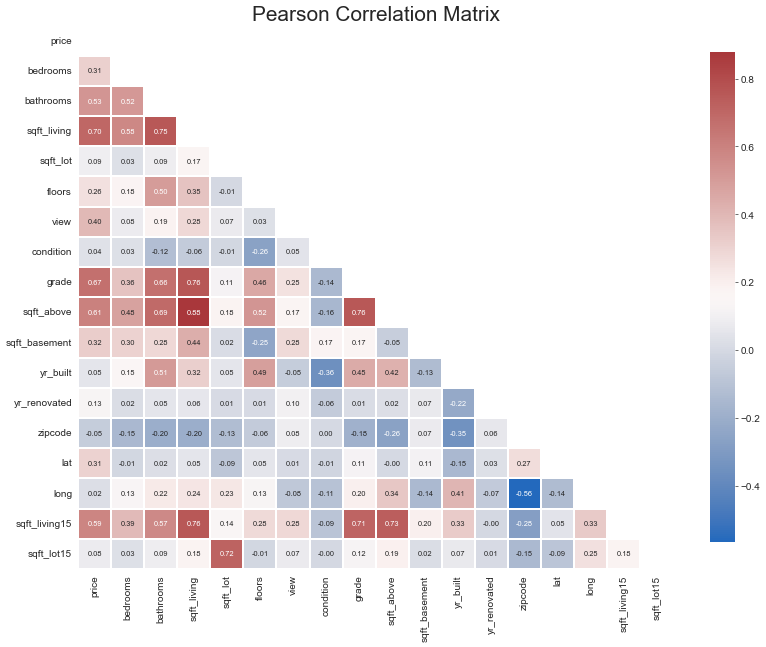

In [62]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(data[features].corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(data[features].corr(),linewidths=0.25,fmt=".2f", cmap="vlag", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});

In [63]:
df4 = data[['price','zipcode','season']].groupby(['zipcode','season']).median().reset_index()
df4.columns = ['zipcode', 'season','season_median_price']
data = pd.merge(data,df4, on=['zipcode','season'], how='inner')
#df4

#df4 = data[['price','zipcode','season']].groupby(['zipcode']).mean().reset_index()
#df4.columns = ['zipcode', 'season','season_mean_price']
data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_m2,year,month,week_of_year,day,season,data_age,season_median_price
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,No,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.05,2014,10,42,13,Fall,old,287000.0
1,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,No,0,3,7,1300,0,1961,0,98178,47.5053,-122.255,1320,7619,181.54,2014,9,39,25,Fall,so,287000.0
2,1180002378,2014-09-26,299000.0,4,2.50,1950,3000,2.0,No,0,3,7,1950,0,2002,0,98178,47.4977,-122.226,1170,6000,153.33,2014,9,39,26,Fall,New,287000.0
3,1180500070,2014-11-24,335000.0,4,2.50,2330,7050,2.0,No,0,3,8,2330,0,1998,0,98178,47.5001,-122.231,1810,5424,143.78,2014,11,48,24,Fall,so,287000.0
4,179000350,2014-11-05,194000.0,3,1.50,1010,5000,1.0,No,0,3,6,1010,0,1943,0,98178,47.4925,-122.278,980,5000,192.08,2014,11,45,5,Fall,old,287000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3025300250,2015-05-13,1620000.0,4,2.25,2350,17709,2.0,No,0,4,9,2350,0,1977,0,98039,47.6232,-122.236,3360,19855,689.36,2015,5,20,13,Spring,so,1725500.0
21609,7397300170,2014-05-30,3710000.0,4,3.50,5550,28078,2.0,No,2,4,12,3350,2200,2000,0,98039,47.6395,-122.234,2980,19602,668.47,2014,5,22,30,Spring,so,1725500.0
21610,3262300920,2015-04-08,1200000.0,4,3.00,2150,8119,2.0,No,0,3,8,2150,0,1953,2004,98039,47.6335,-122.236,1590,8119,558.14,2015,4,15,8,Spring,old,1725500.0
21611,2470200020,2014-05-14,1880000.0,4,2.75,3260,19542,1.0,No,0,4,10,2170,1090,1968,0,98039,47.6245,-122.236,3480,19863,576.69,2014,5,20,14,Spring,so,1725500.0


<AxesSubplot:xlabel='season', ylabel='season_median_price'>

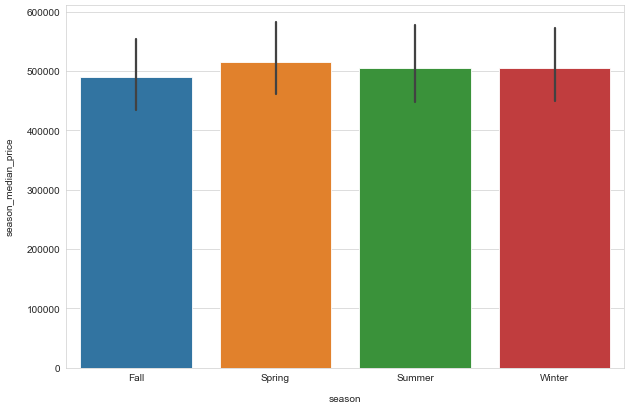

In [64]:
sns.barplot(data=df4, x='season',y='season_median_price')

## Premissas de Negócio

**Estratégia de Compra:**

  - A empresa não faz compras de imoveis com baixo estado de conservação ( condition < 2) e preço médio acima da média da região.
  - A empresa não faz compras de imoveis com valor acima de $4,000,00.00
  - A empresa compra o imóvel caso o preço do imovel seja inferior a 20% do preço da mediana da região.
    
**Estrategia de Revenda:**
   - Se o preço de compra for maior que a mediana da região mais a sazionalidade o preço de venda será igual ao 10% do valor de compra.
   - Se o preço de compra for menor que a mediana da região mais a sazionalidade o preço de venda será igual ao 30% do valor de compra.
    
   



In [65]:
#calculating sell price and profit with sell price
data['sell_price'] = data[['season_median_price','price']].apply(lambda x: x['price']*0.1 if x['price'] >= x['season_median_price'] 
                                                                                                        else x['price']*0.3, axis=1)

In [66]:
data['recommendation'] = data[['price', 'season_median_price','condition']].apply(lambda x: 'Buy' if (x['price']*1.3 < x['season_median_price']) & (x['condition'] >=3) else 'Not Buy', axis=1)

In [67]:
data['profit'] = data[['sell_price','price']].apply(lambda x: x['sell_price'] - x['price'], axis=1)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_m2,year,month,week_of_year,day,season,data_age,season_median_price,sell_price,recommendation,profit
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,No,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.05,2014,10,42,13,Fall,old,287000.0,66570.0,Not Buy,-155330.0
1,2976800796,2014-09-25,236000.0,3,1.0,1300,5898,1.0,No,0,3,7,1300,0,1961,0,98178,47.5053,-122.255,1320,7619,181.54,2014,9,39,25,Fall,so,287000.0,70800.0,Not Buy,-165200.0
2,1180002378,2014-09-26,299000.0,4,2.5,1950,3000,2.0,No,0,3,7,1950,0,2002,0,98178,47.4977,-122.226,1170,6000,153.33,2014,9,39,26,Fall,New,287000.0,29900.0,Not Buy,-269100.0
3,1180500070,2014-11-24,335000.0,4,2.5,2330,7050,2.0,No,0,3,8,2330,0,1998,0,98178,47.5001,-122.231,1810,5424,143.78,2014,11,48,24,Fall,so,287000.0,33500.0,Not Buy,-301500.0
4,179000350,2014-11-05,194000.0,3,1.5,1010,5000,1.0,No,0,3,6,1010,0,1943,0,98178,47.4925,-122.278,980,5000,192.08,2014,11,45,5,Fall,old,287000.0,58200.0,Buy,-135800.0


<AxesSubplot:xlabel='recommendation', ylabel='count'>

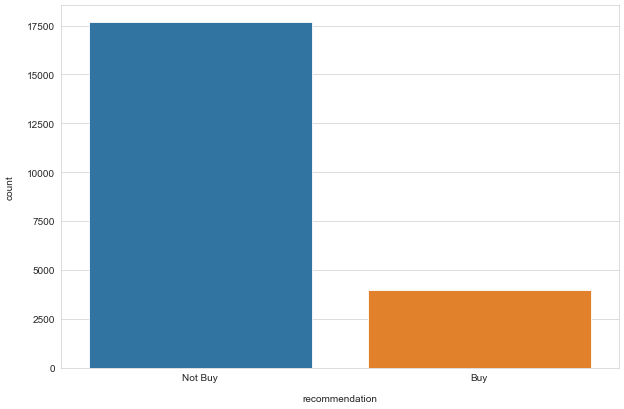

In [68]:
sns.countplot(x='recommendation', data=data)

In [69]:
agen_cancel = data[['price','sell_price','profit','recommendation','zipcode']].groupby(['zipcode','recommendation']).agg({'price':sum, 'sell_price': sum, 'profit': sum})
agen_cancel = data[data['recommendation']=='Buy']
agen_cancel



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_m2,year,month,week_of_year,day,season,data_age,season_median_price,sell_price,recommendation,profit
4,179000350,2014-11-05,194000.0,3,1.5,1010,5000,1.0,No,0,3,6,1010,0,1943,0,98178,47.4925,-122.278,980,5000,192.08,2014,11,45,5,Fall,old,287000.0,58200.0,Buy,-135800.0
7,179003055,2014-11-13,210000.0,3,1.0,1200,7500,1.0,No,0,3,6,1200,0,1905,1989,98178,47.4921,-122.275,1010,7000,175.00,2014,11,46,13,Fall,old,287000.0,63000.0,Buy,-147000.0
10,3352402250,2014-10-21,119900.0,2,1.0,700,3180,1.0,No,0,3,6,480,220,1951,0,98178,47.4976,-122.262,1760,6360,171.29,2014,10,43,21,Fall,old,287000.0,35970.0,Buy,-83930.0
11,399000195,2014-10-20,200000.0,3,1.0,960,7500,1.0,No,0,3,6,960,0,1953,0,98178,47.4966,-122.255,1250,6000,208.33,2014,10,43,20,Fall,old,287000.0,60000.0,Buy,-140000.0
19,7812800865,2014-11-19,170000.0,2,1.0,810,9882,1.0,No,0,3,6,810,0,1944,0,98178,47.4925,-122.239,950,7200,209.88,2014,11,47,19,Fall,old,287000.0,51000.0,Buy,-119000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21594,6123600100,2014-12-15,191000.0,3,1.0,990,8255,1.0,No,0,3,7,990,0,1953,0,98148,47.4250,-122.331,1180,9750,192.93,2014,12,51,15,Winter,old,255000.0,57300.0,Buy,-133700.0
21599,2210500019,2015-03-24,937500.0,3,1.0,1320,8500,1.0,No,0,4,7,1320,0,1954,0,98039,47.6187,-122.226,2790,10800,710.23,2015,3,13,24,Spring,old,1725500.0,281250.0,Buy,-656250.0
21600,6447300345,2015-04-06,1160000.0,4,3.0,2680,15438,2.0,No,2,3,8,2680,0,1902,1956,98039,47.6109,-122.226,4480,14406,432.84,2015,4,15,6,Spring,old,1725500.0,348000.0,Buy,-812000.0
21606,5427110040,2014-06-09,1225000.0,4,2.5,2740,16007,2.0,No,0,3,9,2740,0,1984,0,98039,47.6353,-122.229,2760,16008,447.08,2014,6,24,9,Spring,so,1725500.0,367500.0,Buy,-857500.0


In [70]:
xxxx = data.groupby('zipcode', as_index = False).agg({'id': 'count', 'price': 'mean'}).sort_values('price', ascending = True)

In [76]:
profit = data['profit']
investment = data['price']
sales = data['sell_price']

In [77]:
aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot( index='year_week', columns='assortment', values='sales' ).plot()

KeyError: 'assortment'